In [3]:
# select the data
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
from utils import *


# Download the data
Please, uncomment and run the commands below to download the data

In [1]:
!wget http://cmp.felk.cvut.cz/~mishkdmy/CVPR-RANSAC-Tutorial-2020/homography.tar.gz
!tar -xf  homography.tar.gz

--2020-05-25 16:44:14--  http://cmp.felk.cvut.cz/~mishkdmy/CVPR-RANSAC-Tutorial-2020/homography.tar.gz
Resolving cmp.felk.cvut.cz (cmp.felk.cvut.cz)... 147.32.84.2
Connecting to cmp.felk.cvut.cz (cmp.felk.cvut.cz)|147.32.84.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67762003 (65M) [application/x-gzip]
Saving to: ‘homography.tar.gz.1’

homography.tar.gz.1 100%[===================>]  64.62M  17.3MB/s    in 3.8s    

2020-05-25 16:44:18 (17.0 MB/s) - ‘homography.tar.gz.1’ saved [67762003/67762003]



In [31]:
from copy import deepcopy
def decolorize(img):
    return  cv2.cvtColor(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB)
def ransac_and_draw_matches_cv2(tentatives, H_gt, img1, img2):
    kps1 = [cv2.KeyPoint(m[0], m[1], 1.0, 0) for m in tentatives]
    kps2 = [cv2.KeyPoint(m[2], m[3], 1.0, 0) for m in tentatives]
    good = []
    for i in range(len(tentatives)):
        good.append(cv2.DMatch(i,i, 1))
    src_pts = tentatives[:,:2]
    dst_pts = tentatives[:,2:]
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 1.0)
    print (deepcopy(mask).astype(np.float32).sum(), 'inliers found')
    if H is None:
        print ("No homography found")
        return
    matchesMask = mask.ravel().tolist()
    h,w,ch = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, H)
    #Ground truth transformation
    dst_GT = cv2.perspectiveTransform(pts, H_gt)
    img2_tr = cv2.polylines(decolorize(img2),[np.int32(dst)],True,(0,0,255),3, cv2.LINE_AA)
    img2_tr = cv2.polylines(deepcopy(img2_tr),[np.int32(dst_GT)],True,(0,255,0),3, cv2.LINE_AA)
    # Blue is estimated, green is ground truth homography
    draw_params = dict(matchColor = (255,255,0), # draw matches in yellow color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
    img_out = cv2.drawMatches(decolorize(img1),kps1,img2_tr,kps2,good,None,**draw_params)
    plt.figure(figsize=(10,8))
    plt.imshow(img_out)
    return

# Load the data

# Read Extreme view dataset data

22.0 inliers found


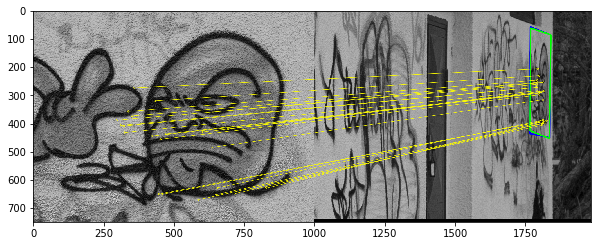

In [32]:
DIR = 'homography'

dataset = 'EVD'
split = 'val'
matches = load_h5(f'{DIR}/{dataset}/{split}/matches.h5')
Hgt = load_h5(f'{DIR}/{dataset}/{split}/Hgt.h5')
matches_scores  = load_h5(f'{DIR}/{dataset}/{split}/match_conf.h5')



count = 0
pair_to_show = 1
for k, H in Hgt.items():
    if count < pair_to_show:
        count +=1
        continue
    m = matches[k]
    key_pair = k
    ms = matches_scores[k].reshape(-1)
    img1_fname = f'{DIR}/{dataset}/{split}/imgs/1/' + k.split('-')[0] + '.png'
    img2_fname = f'{DIR}/{dataset}/{split}/imgs/2/' + k.split('-')[0] + '.png'
    img1 = cv2.cvtColor(cv2.imread(img1_fname), cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(img2_fname), cv2.COLOR_BGR2RGB)
    good_matches = ms < 0.6
    ransac_and_draw_matches_cv2(m[good_matches], H, img1, img2)
    
    break
    
    

# Read HPatches Sequences dataset data

v_artisans_1_6
267.0 inliers found


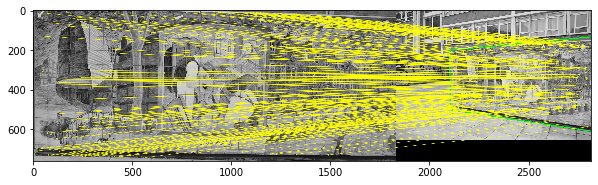

In [34]:
DIR = 'homography'

dataset = 'HPatchesSeq'
split = 'val'
matches = load_h5(f'{DIR}/{dataset}/{split}/matches.h5')
Hgt = load_h5(f'{DIR}/{dataset}/{split}/Hgt.h5')
matches_scores  = load_h5(f'{DIR}/{dataset}/{split}/match_conf.h5')



count = 0
pair_to_show = 4
for k, H in Hgt.items():
    if count < pair_to_show:
        count +=1
        continue
    m = matches[k]
    key_pair = k
    print (k)
    ms = matches_scores[k].reshape(-1)
    img1_fname = f'{DIR}/{dataset}/{split}/imgs/{k[:-4]}/1.ppm'
    img2_fname = f'{DIR}/{dataset}/{split}/imgs/{k[:-4]}/{k[-1]}.ppm'
    img1 = cv2.cvtColor(cv2.imread(img1_fname), cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(img2_fname), cv2.COLOR_BGR2RGB)
    good_matches = ms < 0.6
    ransac_and_draw_matches_cv2(m[good_matches], H, img1, img2)
    
    break
    
    